In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh, gs_Domain
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

In [5]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.02
vac_dx = 0.075

limiter = np.array([[ 1.24534399e+03,  4.41777954e+02],
       [ 1.24521240e+03,  4.45979675e+02],
       [ 1.24590259e+03,  4.50112549e+02],
       [ 1.25587366e+03,  4.83218201e+02],
       [ 1.25649060e+03,  4.85281708e+02],
       [ 1.25651770e+03,  4.85517456e+02],
       [ 1.25697620e+03,  4.89526245e+02],
       [ 1.25691943e+03,  4.89756927e+02],
       [ 1.25595532e+03,  4.93674683e+02],
       [ 1.25582166e+03,  4.93871429e+02],
       [ 1.25355579e+03,  4.97209259e+02],
       [ 1.25336194e+03,  4.97347382e+02],
       [ 1.25007678e+03,  4.99688782e+02],
       [ 1.24984705e+03,  4.99750946e+02],
       [ 1.24595288e+03,  5.00803802e+02],
       [ 1.24570630e+03,  5.00781097e+02],
       [ 1.24166101e+03,  5.00415131e+02],
       [ 1.23111572e+03,  4.97508057e+02],
       [ 1.16439502e+03,  4.79163300e+02],
       [ 1.15845825e+03,  4.78096649e+02],
       [ 1.15664648e+03,  4.77774414e+02],
       [ 1.15049536e+03,  4.77817596e+02],
       [ 1.14874963e+03,  4.77829864e+02],
       [ 1.14271045e+03,  4.78996674e+02],
       [ 1.14099634e+03,  4.79327850e+02],
       [ 1.13527222e+03,  4.81578796e+02],
       [ 1.13364697e+03,  4.82217865e+02],
       [ 1.12843152e+03,  4.85476807e+02],
       [ 1.12694983e+03,  4.86402557e+02],
       [ 1.12553064e+03,  4.87718964e+02],
       [ 1.12108521e+03,  4.91740936e+02],
       [ 1.10124255e+03,  5.13649719e+02],
       [ 1.06885046e+03,  5.49311279e+02],
       [ 1.06759534e+03,  5.50194214e+02],
       [ 1.06603064e+03,  5.51294922e+02],
       [ 1.06451794e+03,  5.51555481e+02],
       [ 1.06263318e+03,  5.51880188e+02],
       [ 1.06115454e+03,  5.51468018e+02],
       [ 1.05931213e+03,  5.50954468e+02],
       [ 1.05815283e+03,  5.49949280e+02],
       [ 1.05670715e+03,  5.48695862e+02],
       [ 1.05607520e+03,  5.47219055e+02],
       [ 1.05531262e+03,  5.45539368e+02],
       [ 1.04769836e+03,  5.06575348e+02],
       [ 1.04019312e+03,  4.68169556e+02],
       [ 1.03975000e+03,  4.66845245e+02],
       [ 1.03930725e+03,  4.65522095e+02],
       [ 1.03853857e+03,  4.64355774e+02],
       [ 1.03777100e+03,  4.63191193e+02],
       [ 1.03669287e+03,  4.62212463e+02],
       [ 1.03568506e+03,  4.61333374e+02],
       [ 1.03447571e+03,  4.60810211e+02],
       [ 1.02668494e+03,  4.45385559e+02],
       [ 9.03697693e+02,  3.69459198e+02],
       [ 8.36732849e+02,  3.28206818e+02],
       [ 7.99026001e+02,  2.62808014e+02],
       [ 7.17693848e+02,  1.22144684e+02],
       [ 7.17693848e+02, -8.14138222e+00],
       [ 7.17693848e+02, -1.22144684e+02],
       [ 7.99026001e+02, -2.62808014e+02],
       [ 8.36732849e+02, -3.28206818e+02],
       [ 9.03697693e+02, -3.69459198e+02],
       [ 1.02668494e+03, -4.45385559e+02],
       [ 1.02747693e+03, -4.46164520e+02],
       [ 1.02906445e+03, -4.47725922e+02],
       [ 1.02944031e+03, -4.48772278e+02],
       [ 1.03447571e+03, -4.60810211e+02],
       [ 1.03568506e+03, -4.61333374e+02],
       [ 1.03669287e+03, -4.62212463e+02],
       [ 1.03777100e+03, -4.63191193e+02],
       [ 1.03853857e+03, -4.64355774e+02],
       [ 1.03930725e+03, -4.65522095e+02],
       [ 1.03975000e+03, -4.66845276e+02],
       [ 1.04019312e+03, -4.68169556e+02],
       [ 1.04769824e+03, -5.06575317e+02],
       [ 1.05531262e+03, -5.45539368e+02],
       [ 1.05607520e+03, -5.47219055e+02],
       [ 1.05670715e+03, -5.48695862e+02],
       [ 1.05786340e+03, -5.49698303e+02],
       [ 1.05931213e+03, -5.50954468e+02],
       [ 1.06078564e+03, -5.51365173e+02],
       [ 1.06263318e+03, -5.51880188e+02],
       [ 1.06414038e+03, -5.51620544e+02],
       [ 1.06603064e+03, -5.51294922e+02],
       [ 1.06728210e+03, -5.50414612e+02],
       [ 1.06885046e+03, -5.49311279e+02],
       [ 1.10124255e+03, -5.13649719e+02],
       [ 1.12108521e+03, -4.91740936e+02],
       [ 1.12553064e+03, -4.87718964e+02],
       [ 1.12694983e+03, -4.86402557e+02],
       [ 1.13215186e+03, -4.83152191e+02],
       [ 1.13364697e+03, -4.82217865e+02],
       [ 1.13935474e+03, -4.79973358e+02],
       [ 1.14099634e+03, -4.79327850e+02],
       [ 1.14701746e+03, -4.78164551e+02],
       [ 1.14874963e+03, -4.77829864e+02],
       [ 1.15488208e+03, -4.77786804e+02],
       [ 1.15664648e+03, -4.77774414e+02],
       [ 1.15845825e+03, -4.78096649e+02],
       [ 1.16439502e+03, -4.79163300e+02],
       [ 1.23111572e+03, -4.97508057e+02],
       [ 1.24166101e+03, -5.00415131e+02],
       [ 1.24570630e+03, -5.00781097e+02],
       [ 1.24595288e+03, -5.00803802e+02],
       [ 1.24618127e+03, -5.00742035e+02],
       [ 1.25007678e+03, -4.99688782e+02],
       [ 1.25026965e+03, -4.99551361e+02],
       [ 1.25355579e+03, -4.97209259e+02],
       [ 1.25368896e+03, -4.97013214e+02],
       [ 1.25595532e+03, -4.93674683e+02],
       [ 1.25601196e+03, -4.93444336e+02],
       [ 1.25697620e+03, -4.89526245e+02],
       [ 1.25694910e+03, -4.89290314e+02],
       [ 1.25649060e+03, -4.85281708e+02],
       [ 1.25587366e+03, -4.83218201e+02],
       [ 1.24590259e+03, -4.50112549e+02],
       [ 1.24521240e+03, -4.45979675e+02],
       [ 1.24534399e+03, -4.41777954e+02],
       [ 1.24915637e+03, -4.23620514e+02],
       [ 1.24717578e+03, -4.21136871e+02],
       [ 1.24703455e+03, -4.20959747e+02],
       [ 1.24698376e+03, -4.20725067e+02],
       [ 1.24623376e+03, -4.17641846e+02],
       [ 1.24623376e+03, -2.81484955e+02],
       [ 1.24623376e+03, -2.60534546e+02],
       [ 1.24639685e+03, -2.58009613e+02],
       [ 1.24657886e+03, -2.51063934e+02],
       [ 1.24732080e+03, -2.45427139e+02],
       [ 1.24781604e+03, -2.41665405e+02],
       [ 1.24944141e+03, -2.34881485e+02],
       [ 1.24993616e+03, -2.32410492e+02],
       [ 1.28456738e+03, -1.03507896e+02],
       [ 1.28456763e+03,  7.90056147e-05],
       [ 1.28456763e+03,  1.03507156e+02],
       [ 1.24993616e+03,  2.32410492e+02],
       [ 1.24944141e+03,  2.34881485e+02],
       [ 1.24781604e+03,  2.41665405e+02],
       [ 1.24707349e+03,  2.47306671e+02],
       [ 1.24657886e+03,  2.51063934e+02],
       [ 1.24639685e+03,  2.58009613e+02],
       [ 1.24623376e+03,  2.60534546e+02],
       [ 1.24623376e+03,  3.97346283e+02],
       [ 1.24623376e+03,  4.18397461e+02],
       [ 1.24698376e+03,  4.21480713e+02],
       [ 1.24703455e+03,  4.21715393e+02]])

vv_outer = np.array([[1530.65148926,  220.        ],
       [1500.63879395,  220.        ],
       [1500.63879395,  200.        ],
       [1399.87316895,  200.        ],
       [1399.84533691,  256.60427856],
       [1472.52368164,  279.62091064],
       [1481.43310547,  251.49797058],
       [1500.50280762,  257.53723145],
       [1435.56945801,  462.50097656],
       [1416.49975586,  456.46173096],
       [1425.40930176,  428.33880615],
       [1399.84533691,  420.24295044],
       [1399.87207031,  470.        ],
       [1289.99987793,  470.00009155],
       [1289.99975586,  635.        ],
       [1068.09130859,  635.        ],
       [1068.09130859,  744.92041016],
       [1102.09423828,  744.92041016],
       [1102.09423828,  764.92041016],
       [ 877.07501221,  764.92041016],
       [ 877.07501221,  744.92041016],
       [ 887.0758667 ,  744.92041016],
       [ 887.0758667 ,  635.        ],
       [ 869.95117188,  635.        ],
       [ 869.95117188,  470.        ],
       [ 658.95697021,  470.        ],
       [ 658.95697021, -470.        ],
       [ 869.95117188, -470.        ],
       [ 869.95117188, -635.        ],
       [ 887.0758667 , -635.        ],
       [ 887.0758667 , -744.92041016],
       [ 877.07501221, -744.92041016],
       [ 877.07501221, -764.92041016],
       [1073.09191895, -764.92059326],
       [1073.09191895, -744.92059326],
       [1068.09130859, -744.92041016],
       [1068.09130859, -635.        ],
       [1289.99975586, -635.        ],
       [1289.99987793, -470.00009155],
       [1399.87207031, -470.        ],
       [1399.88354492, -443.76760864],
       [1455.8515625 , -462.43685913],
       [1452.05419922, -473.82019043],
       [1471.02697754, -480.14892578],
       [1527.98706055, -309.39849854],
       [1509.01428223, -303.06976318],
       [1505.21691895, -314.453125  ],
       [1399.88354492, -279.31704712],
       [1399.87316895, -200.        ],
       [1500.63879395, -200.        ],
       [1500.63879395, -220.        ],
       [1530.65148926, -220.        ]])

vv_inner = np.array([[1500.63879395,  195.        ],
       [1392.3737793 ,  195.        ],
       [1389.87475586,  200.        ],
       [1389.85327148,  256.5866394 ],
       [1471.61755371,  282.48086548],
       [1426.31530762,  425.47885132],
       [1389.85327148,  413.93151855],
       [1389.87304688,  460.        ],
       [1279.95019531,  460.        ],
       [1279.95019531,  625.        ],
       [1065.09118652,  625.        ],
       [1065.09106445,  744.92041016],
       [ 890.07617188,  744.92041016],
       [ 890.07617188,  625.        ],
       [ 879.95056152,  625.        ],
       [ 879.95056152,  460.        ],
       [ 669.24145508,  460.        ],
       [ 669.24145508, -460.        ],
       [ 879.95056152, -460.        ],
       [ 879.95056152, -625.        ],
       [ 890.07617188, -625.        ],
       [ 890.07617188, -744.92041016],
       [1065.09106445, -744.92041016],
       [1065.09118652, -625.        ],
       [1279.95019531, -625.        ],
       [1279.95019531, -460.        ],
       [1389.87304688, -460.        ],
       [1389.88684082, -437.27053833],
       [1456.80090332, -459.59100342],
       [1504.26757812, -317.29898071],
       [1389.88684082, -279.14501953],
       [1389.87475586, -200.        ],
       [1392.3737793 , -195.        ],
       [1500.63879395, -195.        ]])

coils = {
    'CS_1':{'r': 0.58, 'z': 0.615, 'dr': 0.075,'dz': 0.43},
    'CS_2':{'r': 0.58, 'z': 0.0, 'dr': 0.075,'dz': 0.8},
    'CS_3':{'r': 0.58, 'z': -0.615, 'dr': 0.075,'dz': 0.43},

    'PF_1U':{'r': 0.738, 'z': 0.6, 'dr': 0.125,'dz': 0.125}, 
    'PF_2U':{'r': 1.2, 'z': 0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3U':{'r': 1.4, 'z': 0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4U':{'r': 1.95, 'z': 0.3, 'dr': 0.175,'dz': 0.175},

    'PF_1L':{'r': 0.738, 'z': -0.6, 'dr': 0.125,'dz': 0.125},
    'PF_2L':{'r': 1.2, 'z': -0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3L':{'r': 1.4, 'z': -0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4L':{'r': 1.95, 'z': -0.3, 'dr': 0.175,'dz': 0.175}
}

import json
with open('nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)

In [7]:
# Create a G-S domain
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
gs_mesh.define_region('vacuum',vac_dx,'vacuum')  # Define the vacuum inside the VV
gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

# Define each of the PF coils
gs_mesh.define_region('CS_1',coil_dx,'coil')
gs_mesh.define_region('CS_2',coil_dx,'coil')
gs_mesh.define_region('CS_3',coil_dx,'coil')
gs_mesh.define_region('PF_1U',coil_dx,'coil')
gs_mesh.define_region('PF_1L',coil_dx,'coil')
gs_mesh.define_region('PF_2U',coil_dx,'coil')
gs_mesh.define_region('PF_2L',coil_dx,'coil')
gs_mesh.define_region('PF_3U',coil_dx,'coil')
gs_mesh.define_region('PF_3L',coil_dx,'coil')
gs_mesh.define_region('PF_4U',coil_dx,'coil')
gs_mesh.define_region('PF_4L',coil_dx,'coil')

gs_mesh.define_region('DIV_U',coil_dx,'coil')
gs_mesh.define_region('DIV_L',coil_dx,'coil')

gs_mesh.define_region('in_lower_plate',vv_dx/10,'conductor',eta=3.8E-8)
#gs_mesh.define_region('out_lower_plate',vv_dx/10,'conductor',eta=3.8E-8)
gs_mesh.define_region('in_upper_plate',vv_dx/10,'conductor',eta=3.8E-8)
#gs_mesh.define_region('out_upper_plate',vv_dx/10,'conductor',eta=3.8E-8)


In [8]:
# Define geometry
gs_mesh.add_polygon(limiter/1000,'plasma',parent_name='vacuum')  # Define the shape of the limiter
gs_mesh.add_annulus(vv_inner/1000, 'vacuum', vv_outer/1000, 'vv', parent_name = 'air')
#gs_mesh.add_annulus(vv_inner_old/1000, 'plasma', vv_outer_old/1000, 'vv', parent_name = 'air')

# Define each of the PF coils
for key, val in coils.items():
    gs_mesh.add_rectangle(val['r'],val['z'],val['dr'],val['dz'],key,parent_name = 'air')


gs_mesh.add_polygon(np.array(nsf_geom['DIV2L'])/1000, 'DIV_L',parent_name = 'plasma')
gs_mesh.add_polygon(np.array(nsf_geom['DIV2U'])/1000,'DIV_U',parent_name = 'plasma')

#gs_mesh.add_polygon(np.array(nsf_geom['DIV1L'])/1000, 'DIV_1L',parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['DIV1U'])/1000, 'DIV_1U',parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['DIV2L'])/1000, 'DIV_2L',parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['DIV2U'])/1000,'DIV_2U',parent_name = 'plasma')

gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000,'in_lower_plate',parent_name='vacuum')
#gs_mesh.add_polygon(np.array(nsf_geom['out_lower_plate'])/1000,'out_lower_plate',parent_name='vacuum')
gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000,'in_upper_plate',parent_name='vacuum')
#gs_mesh.add_polygon(np.array(nsf_geom['out_upper_plate'])/1000,'out_upper_plate',parent_name='vacuum')



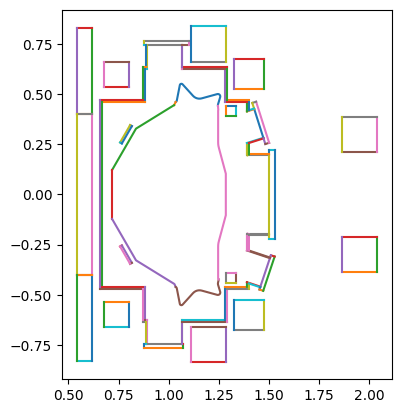

In [9]:
fig, ax = plt.subplots(1,1)
for region in gs_mesh.regions:
    region.plot_segments(fig,ax)
ax.set_aspect('equal','box')

In [10]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 1170
  # of unique segments  = 153
Generating mesh:
  # of points  = 5201
  # of cells   = 10284
  # of regions = 19


In [11]:
mygs = TokaMaker()

mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Turn off divertor coils
coil_bounds[-3:-1, 0] = 0
coil_bounds[-3:-1, 1] = 0

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.914E+00
    # of points  =    5201
    # of edges   =   15484
    # of cells   =   10284
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  1.247E-03
    hrms =  3.554E-02
    hmax =  1.0

In [13]:
from omfit_classes.omfit_eqdsk import boundaryShape
e = 1.7
d = -0.5
r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
boundary = np.column_stack((r,z))
boundary = np.nan_to_num(boundary)

x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
x_weights = 50*np.ones(2)
mygs.set_saddles(x_points, x_weights)

isoflux_weights = 50*np.ones(len(boundary))
mygs.set_isoflux(boundary, isoflux_weights)

mygs.init_psi(0.68,0,0.2, 1.8,0.3)
mygs.settings.maxits = 100
mygs.update_settings()
mygs.solve()

eig_vals, eig_vecs = mygs.eig_td(-5.E4,10,True) 

Starting non-linear GS solver
     1  6.5257E+00  3.1091E+00  2.8718E-02  1.0359E+00 -3.2924E-05 -0.0000E+00
     2  6.1687E+00  2.9439E+00  6.6082E-03  1.0371E+00 -2.9954E-05 -0.0000E+00
     3  6.0521E+00  2.8914E+00  1.1767E-03  1.0374E+00 -2.4313E-05 -0.0000E+00
     4  6.0071E+00  2.8712E+00  1.5726E-04  1.0374E+00 -2.0157E-05 -0.0000E+00
     5  5.9892E+00  2.8632E+00  1.0421E-04  1.0374E+00 -1.7576E-05 -0.0000E+00
     6  5.9821E+00  2.8599E+00  7.2075E-05  1.0374E+00 -1.6098E-05 -0.0000E+00
     7  5.9792E+00  2.8586E+00  3.9578E-05  1.0374E+00 -1.5282E-05 -0.0000E+00
     8  5.9781E+00  2.8581E+00  1.9625E-05  1.0374E+00 -1.4841E-05 -0.0000E+00
     9  5.9777E+00  2.8579E+00  9.2019E-06  1.0374E+00 -1.4607E-05 -0.0000E+00
    10  5.9775E+00  2.8578E+00  4.1621E-06  1.0374E+00 -1.4485E-05 -0.0000E+00
    11  5.9775E+00  2.8578E+00  1.8343E-06  1.0374E+00 -1.4421E-05 -0.0000E+00
    12  5.9774E+00  2.8578E+00  7.9221E-07  1.0374E+00 -1.4388E-05 -0.0000E+00
 Timing:  0.1607929999

In [16]:
print(eig_vals[0][0])
#no plates -> -91149.41815197
# both plates -> -390.7125204582917
#inboard plates -> -2507.1438520428273

-2507.1438520428273


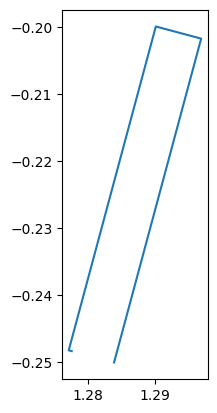

In [18]:
out_plate = np.array(nsf_geom['out_lower_plate'])/1000
plt.plot(out_plate[:,0], out_plate[:,1])
plt.gca().set_aspect(aspect = 1)

In [20]:
def rotate_polygon(polygon, angle, center):
    # Convert angle from degrees to radians
    angle_rad = np.deg2rad(angle)
    
    # Create the rotation matrix
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    
    # Shift the polygon to the origin (subtract the center)
    shifted_polygon = polygon - center
    
    # Apply the rotation
    rotated_polygon = np.dot(shifted_polygon, rotation_matrix)
    
    # Shift the polygon back to its original location
    rotated_polygon += center
    
    return rotated_polygon

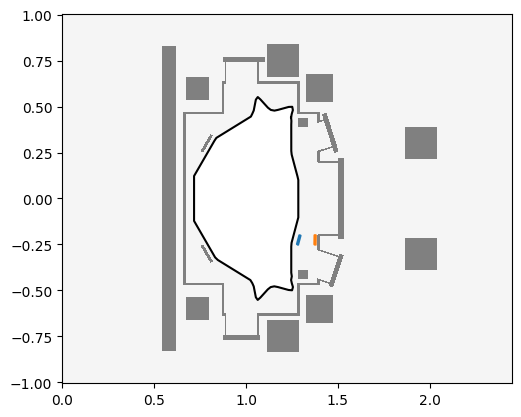

In [32]:
fig, ax = plt.subplots()
mygs.plot_machine(fig,ax)
plt.plot(out_plate[:,0], out_plate[:,1])
plt.gca().set_aspect(aspect = 1)
center = [np.average(out_plate[:,0]), np.average(out_plate[:,1])]
out_plate_new = rotate_polygon(out_plate, -14, center)
test = out_plate_new + [0.09, 0]
plt.plot(test[:,0], test[:,1])
#plt.plot(out_plate_new[:,0]+ 0.09, out_plate_new[:,1])
#plt.plot(out_plate_new[:,0]+ 0.09, -out_plate_new[:,1])
# max is 0.9

Assembling regions:
  # of unique points    = 1282
  # of unique segments  = 161
Generating mesh:
  # of points  = 5590
  # of cells   = 11062
  # of regions = 21

**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.914E+00
    # of points  =    5590
    # of edges   =   16651
    # of cells   =   11062
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  1.253E-03
    hrms =  3.424E-02
    hmax =  1.081E-01
  Surface grounded at vertex    1270


**** Creating Lagrange FE space
  Order  =    2
  Minlev =   -1

 Computing flux BC matrix 
 Inverting real matrix
   Time =    6.0250000000000000E-003
Starting non-linear GS solver
     1  6.5293E+00  3.1108E+00  2.8831E-02  1.0359E+00 -3.0331E-05 -0.0000E+00
     2  6.1715E+00  2.9452E+00  6.6334E-03  1.0370E+00 -2.6382E-05 -0.0000E+00
     3  6.0547E+00  2.8926E+00  1.1810E-03  1.0373E+00 -

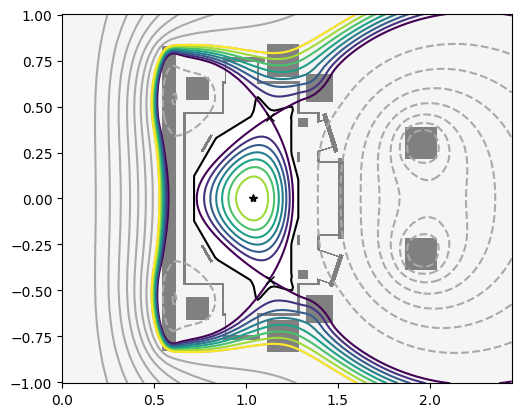

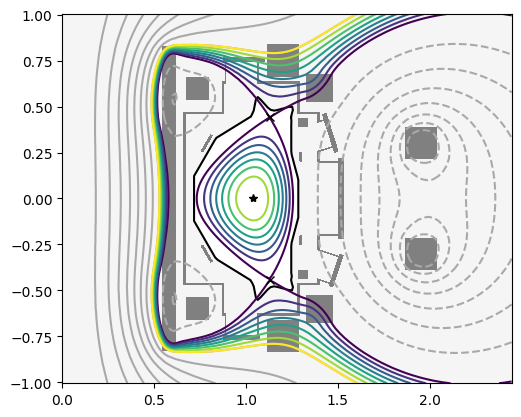

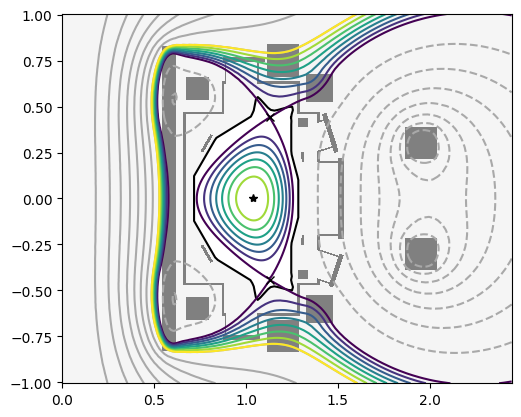

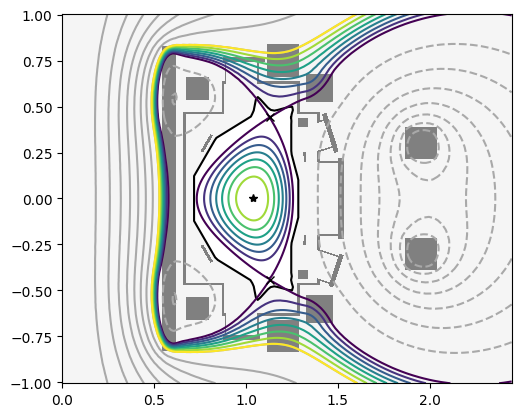

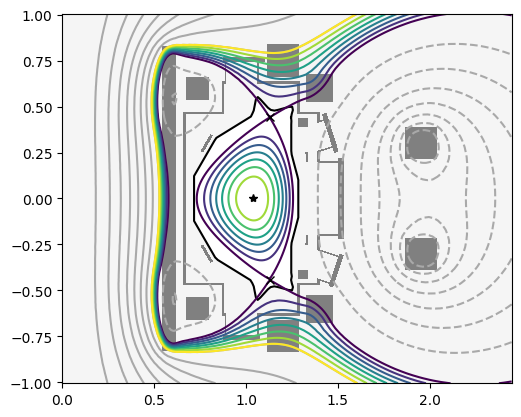

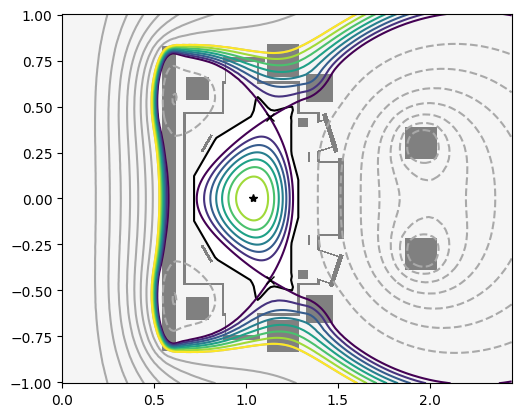

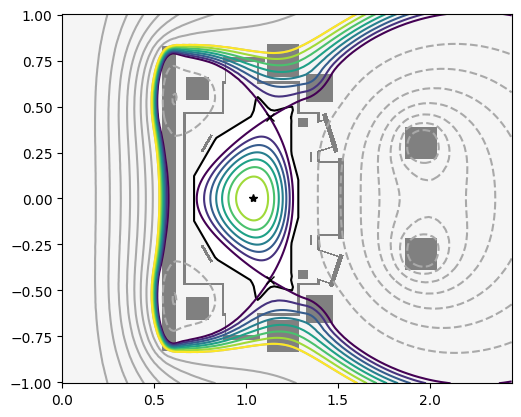

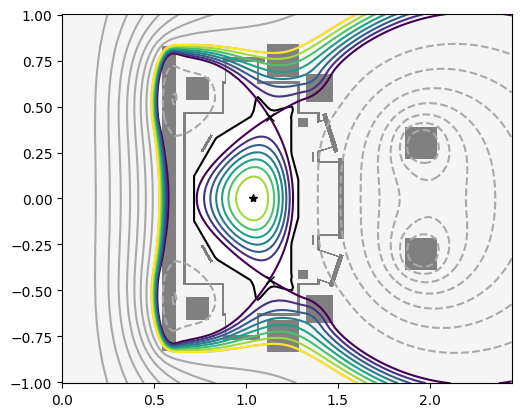

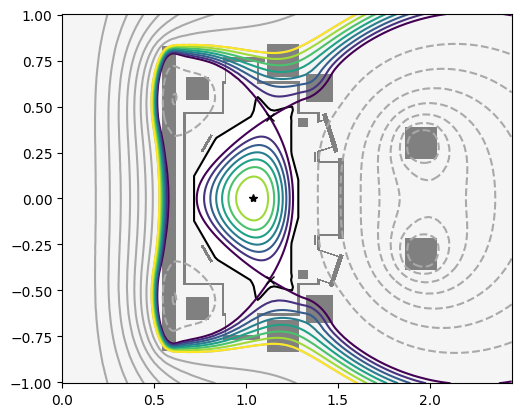

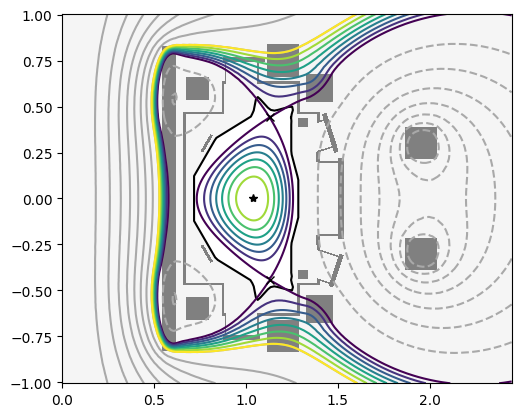

In [85]:
shift = np.linspace(0,0.1, 10)
gammas = []
for s in shift:

    new_plate = out_plate_new + [s,0]
    new_plate_u = np.copy(new_plate)
    new_plate_u[:,1] = -new_plate[:,1]
    mygs.reset()
    # Create a G-S domain
    gs_mesh = gs_Domain()
    # Define region information for mesh
    gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
    gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
    gs_mesh.define_region('vacuum',vac_dx,'vacuum')  # Define the vacuum inside the VV
    gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

    # Define each of the PF coils
    gs_mesh.define_region('CS_1',coil_dx,'coil')
    gs_mesh.define_region('CS_2',coil_dx,'coil')
    gs_mesh.define_region('CS_3',coil_dx,'coil')
    gs_mesh.define_region('PF_1U',coil_dx,'coil')
    gs_mesh.define_region('PF_1L',coil_dx,'coil')
    gs_mesh.define_region('PF_2U',coil_dx,'coil')
    gs_mesh.define_region('PF_2L',coil_dx,'coil')
    gs_mesh.define_region('PF_3U',coil_dx,'coil')
    gs_mesh.define_region('PF_3L',coil_dx,'coil')
    gs_mesh.define_region('PF_4U',coil_dx,'coil')
    gs_mesh.define_region('PF_4L',coil_dx,'coil')

    gs_mesh.define_region('DIV_U',coil_dx,'coil')
    gs_mesh.define_region('DIV_L',coil_dx,'coil')

    gs_mesh.define_region('in_lower_plate',vv_dx/10,'conductor',eta=3.8E-8)
    gs_mesh.define_region('in_upper_plate',vv_dx/10,'conductor',eta=3.8E-8)
    gs_mesh.define_region('out_lower_plate',vv_dx/10,'conductor',eta=3.8E-8)
    gs_mesh.define_region('out_upper_plate',vv_dx/10,'conductor',eta=3.8E-8)

    # Define geometry
    gs_mesh.add_polygon(limiter/1000,'plasma',parent_name='vacuum')  # Define the shape of the limiter
    gs_mesh.add_annulus(vv_inner/1000, 'vacuum', vv_outer/1000, 'vv', parent_name = 'air')

    # Define each of the PF coils
    for key, val in coils.items():
        gs_mesh.add_rectangle(val['r'],val['z'],val['dr'],val['dz'],key,parent_name = 'air')

    gs_mesh.add_polygon(np.array(nsf_geom['DIV2L'])/1000, 'DIV_L',parent_name = 'plasma')
    gs_mesh.add_polygon(np.array(nsf_geom['DIV2U'])/1000,'DIV_U',parent_name = 'plasma')

    gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000,'in_lower_plate',parent_name='vacuum')
    gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000,'in_upper_plate',parent_name='vacuum')

    gs_mesh.add_polygon(new_plate,'out_lower_plate',parent_name='vacuum')
    gs_mesh.add_polygon(new_plate_u,'out_upper_plate',parent_name='vacuum')

    mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
    coil_dict = gs_mesh.get_coils()
    cond_dict = gs_mesh.get_conductors()

    mygs = TokaMaker()

    mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
    mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
    mygs.setup(order=2,F0=1*3)

    coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
    targets = np.zeros(mygs.ncoils+1)
    coil_weights = 0.5*np.ones(mygs.ncoils+1)

    #Constrain CS current
    coil_reg_mat[0,0] = 1
    coil_reg_mat[1,1] = 1
    coil_reg_mat[1,0] = -1
    coil_reg_mat[2,2] = 1
    coil_reg_mat[2,1] = -1

    targets[0] = -3E6

    coil_weights[:3] = 5

    #Enforce up/down symmetry in PF coils
    coil_reg_mat[3,3] = 1
    coil_reg_mat[3,7] = -1
    coil_reg_mat[4,4] = 1
    coil_reg_mat[4,8] = -1
    coil_reg_mat[5,5] = 1
    coil_reg_mat[5,9] = -1
    coil_reg_mat[6,6] = 1
    coil_reg_mat[6,10] = -1

    mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

    #Set upper bound on coil currents
    coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
    coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

    #Turn off divertor coils
    coil_bounds[-3:-1, 0] = 0
    coil_bounds[-3:-1, 1] = 0

    mygs.set_coil_bounds(coil_bounds)

    # Define shape of P' anf FF' profiles
    n_sample = 40
    psi_sample = np.linspace(0.0,1.0,n_sample)
    # Set F*F' profile
    alpha = 2
    gamma = 1.25
    ffp_prof = {
        'type': 'linterp',
        'x': psi_sample,
        'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
    }
    ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
    # Set P' profile
    alpha = 2
    gamma = 1.25
    pp_prof = {
        'type': 'linterp',
        'x': psi_sample,
        'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
    }
    pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

    mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

    # set global targets
    Ip_target = 0.75E6
    mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)
    
    e = 1.7
    d = -0.5
    r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
    boundary = np.column_stack((r,z))
    boundary = np.nan_to_num(boundary)

    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 50*np.ones(2)
    mygs.set_saddles(x_points, x_weights)

    isoflux_weights = 50*np.ones(len(boundary))
    mygs.set_isoflux(boundary, isoflux_weights)

    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()

    fig, ax = plt.subplots()
    mygs.plot_machine(fig,ax)
    mygs.plot_psi(fig,ax)

    eig_vals, eig_vecs = mygs.eig_td(-5.E4,10,True) 

    gammas.append(-eig_vals[0][0])

    


In [86]:
print(gammas)

[384.9103400077147, 450.6898413450108, 531.3743949235068, 628.2678704305072, 745.3183966152501, 886.1958096158123, 1054.0012311019527, 1252.5415660928193, 1483.5656954805745, 1744.2230595194196]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

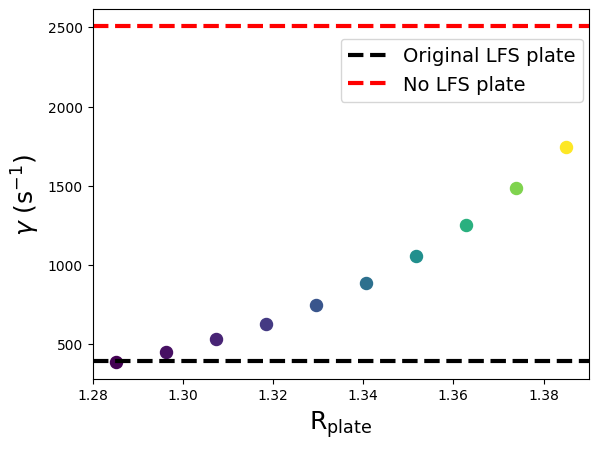

In [89]:
cmap = mpl.cm.viridis(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
norm = plt.Normalize(np.min(gammas), np.max(gammas))
c = cmap(norm(gammas))
for i in range(len(gammas)):
    plt.scatter(shift[i] + center[0],gammas[i], s = 75, c= c[i])
plt.xlim([1.28, 1.39])
plt.hlines(390.7125204582917, 1.28, 1.39, linestyle = '--', color = 'k', linewidth = 3, label = 'Original LFS plate')
plt.hlines(2507.1438520428273, 1.28, 1.39, linestyle = '--', color = 'r', linewidth =3, label = 'No LFS plate' )
plt.xlabel(r'$\mathrm{R}_\mathrm{ plate}$', fontsize =18)
plt.ylabel(r'$\gamma$ ($\mathrm{s}^{-1}$)', fontsize = 18)
plt.legend(fontsize = 14, loc = [0.5, 0.75])

Text(0, 0.5, 'Z (m)')

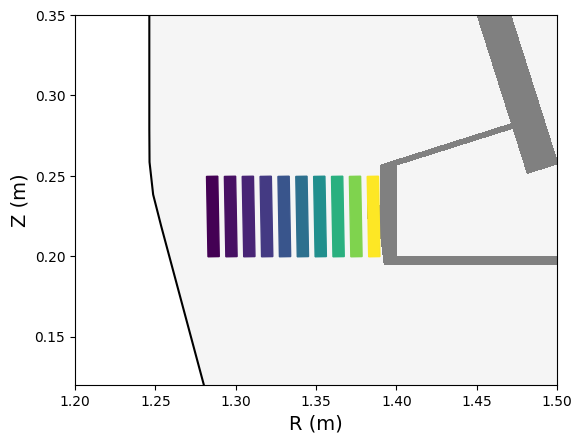

In [91]:
fig,ax = plt.subplots()
mygs.plot_machine(fig,ax)
ax.set_ylim([0.12, 0.35])
ax.set_xlim([1.2, 1.5])

for i in range(len(shift)):
    new_plate = out_plate_new + [shift[i],0]
    new_plate_u = np.copy(new_plate)
    plt.fill(new_plate[:,0], -new_plate_u[:,1], c=c[i])

plt.xlabel('R (m)', fontsize = 14)
plt.ylabel('Z (m)', fontsize = 14)